### ML/DL HW2 - Data Analysis with NYC Taxi dataset

1. Copy this notebook and solve them by following the instruction.
2. Upload the dataset in your directory before executing this code.
  * Train data (71,514 rows; 2023/01/01-2023/01/23): [Download](https://drive.google.com/file/d/15Ne57MIFPFYgDMpbL5kOly9CjAoZe19r/view?usp=sharing)
  * Test data (28,390 rows; 2023/01/24-2023/01/31): [Download](https://drive.google.com/file/d/15Mi8vm2guvePB7RaY6LPi3fxXOwLFlyw/view?usp=sharing)

3. Note: Your code for all of the programming exercises including this one should be submitted to the corresponding Programming submission slot on Gradescope.

Reference
* https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/NYC%20Taxi%20Trip%20Duration.ipynb

In [120]:
!pip install pandas pyarrow sklearn matplotlib
import numpy as np
import pandas as pd
from google.colab import files
files=files.upload()

In [39]:
# Check the below cells before fill in your code.

import pyarrow.parquet as pq

class Dataset:
  train_x = None  # X (data) of training set.
  train_y = None  # Y (label) of training set.
  test_x = None # X (data) of test set.
  test_y = None # Y (label) of test set.

  def __init__(self):
    self.df_train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
    self.df_test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()
    self.df_train = self.preprocess_data(self.df_train)
    self.df_test = self.preprocess_data(self.df_test)

  def preprocess_data(self, df):
    ### TODO: Preprocess your data (Impute null values; DO NOT drop any test cases)
    numerics = df.select_dtypes(include=[np.number]).columns.tolist()
    df[numerics] = df[numerics].fillna(df[numerics].mean())
    return df

  def getdata_linear_reg(self):
    ### Hint: Use self.df_train, self.df_test
    ### Three features (x): Passenger_count, trip_distance, trip_duration (seconds; use tpep_pickup_datetime, tpep_dropoff_datetime)
    ### Target (y): fare_amount
    feature_columns = ['passenger_count', 'trip_distance']
    target_column = 'fare_amount'

    # Calculate the timestamp difference between pickup and dropoff
    self.df_train['trip_duration'] = (self.df_train['tpep_dropoff_datetime'] - self.df_train['tpep_pickup_datetime']).dt.total_seconds()
    self.df_test['trip_duration'] = (self.df_test['tpep_dropoff_datetime'] - self.df_test['tpep_pickup_datetime']).dt.total_seconds()

    self.train_x = self.df_train[feature_columns + ['trip_duration']].to_numpy()
    self.train_y = self.df_train[target_column].to_numpy()

    self.test_x = self.df_test[feature_columns + ['trip_duration']].to_numpy()
    self.test_y = self.df_test[target_column].to_numpy()

    return [self.train_x, self.train_y, self.test_x, self.test_y]

    return [self.train_x, self.train_y, self.test_x, self.test_y]

  def correlation(self, X, Y):
    ### TODO: Correlation with each features
    correlations = {}
    for i, feature in enumerate(['passenger_count', 'trip_distance', 'trip_duration']):
      correlation = np.corrcoef(X[:, i], Y)[0, 1]
      correlations[feature] = correlation

    return correlations



# Test Code

Provide some test code with your Linear regression code. Also, Compare with sklearn.LinearRegression().

### 1. Prepare the dataset (8pt)
Load the train and test datasets.

methods:

(1) **preprocess_data(self, df)**: Handle None and null values (2pt)

(2) **getdata_linear_reg(self)**: Separate the features/labels of the train/test set and save them separately in a numpy array format.(4pt)

(3) **correlation(self, X, Y)**: Calculate the correlation between each features and target Y in training set (2pt)



In [51]:
dataset = Dataset()
[train_x, train_y, test_x, test_y] = dataset.getdata_linear_reg()
print(train_x)
print(train_y)
print(test_x)
print(test_y)

dataset.correlation(train_x, train_y)

[[1.000e+00 2.950e+00 9.220e+02]
 [5.000e+00 2.350e+00 1.715e+03]
 [1.000e+00 2.040e+00 7.050e+02]
 ...
 [1.000e+00 1.212e+01 1.443e+03]
 [1.000e+00 1.640e+00 5.060e+02]
 [1.000e+00 4.030e+00 8.240e+02]]
[17.7 23.3 13.5 ... 47.8 10.7 19.1]
[[1.00000000e+00 1.78000000e+00 4.72000000e+02]
 [1.00000000e+00 8.00000000e-01 1.08000000e+02]
 [2.00000000e+00 3.00000000e+00 7.74000000e+02]
 ...
 [1.33274268e+00 4.34000000e+00 1.08000000e+03]
 [1.33274268e+00 0.00000000e+00 5.48000000e+02]
 [1.33274268e+00 3.05000000e+00 8.39000000e+02]]
[10.7   5.1  16.3  ... 20.88  3.9  15.8 ]


{'passenger_count': 0.03716105344813141,
 'trip_distance': 0.8918598120569134,
 'trip_duration': 0.7929561453649366}

### Question 2: Linear Regression Using Scikit-learn (6 points)

For this task, you are required to implement linear regression utilizing the scikit-learn library. You will be working with the LinearRegression module, which provides functions and methods tailored for this purpose.

For comprehensive documentation and usage guidelines, please refer to the official scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Ensure to:
* Properly import the necessary libraries and modules.
* Provide a brief explanation or observation after obtaining the results.

Root Mean Squared Error (RMSE) on test data: 6.70

Model Coefficients: [0.11415376 2.92476095 0.00525156]
Model Intercept: 3.71


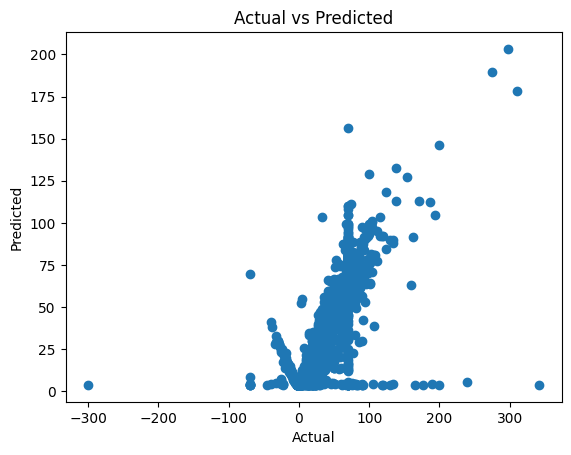

In [41]:
# # Install necessary libraries
# !pip install sklearn

# Import required modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
linear = LinearRegression()

# Fit the model to the training data (Use train_x, train_y, and linear.fit function)
linear.fit(train_x, train_y)

# Predict the target values for the test dataset (Use linear.predict function and test_x to find y_hat)
y_hat = linear.predict(test_x)

def RMSE(true, predicted):
# Calculate the Root Mean Squared Error (RMSE) for model evaluation
  rmse = np.sqrt(mean_squared_error(true, predicted))
  return rmse

error = RMSE(test_y, y_hat)
print(f"Root Mean Squared Error (RMSE) on test data: {error:.2f}")

# Find the slope (coefficients) and intercepts
slope = linear.coef_
intercept = linear.intercept_
print(f"\nModel Coefficients: {slope}")
print(f"Model Intercept: {intercept:.2f}")

import matplotlib.pyplot as plt
# Add plots to visualize the difference between actual vs predicted values
plt.figure()
plt.scatter(test_y, y_hat)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### 3. Craft Your Linear Regression Algorithm (6pt)
Delve into the foundations of linear regression by constructing your own model to make predictions on the dataset.

While detailed annotations will guide your implementation, do not use external libraries such as scikit-learn. Using the numpy library is permitted.

Begin your exploration by understanding the closed form solution for linear regression. Subsequently, familiarize yourself with the gradient descent methodology.



In [113]:
import numpy as np

class Linear:

    def __init__(self, eta=0.0001, epoch=10000, max_gradient=10, cth=1e-6):
        self.w = None
        self.b = None
        self.eta = eta
        self.epoch = epoch
        self.cth = cth
        self.max_gradient = max_gradient

    def setEta(self, etaVal):
        self.eta = etaVal

    def setEpoch(self, nepoch):
        self.epoch = nepoch

    def predict(self, x):
        """
        Perform inference
        """
        y = np.dot(x, self.w) + self.b
        return y

    def train(self, x, y):
        """
        Construct a vanilla linear regressor using gradient descent.
        """
        s, f = x.shape
        self.w = np.zeros(f)
        self.b = 0

        prev_loss = float('inf')

        for epoch in range(self.epoch):
            y_pred = self.predict(x)
            dw = -(2/s) * np.dot(x.T, (y - y_pred))
            db = -(2/f) * np.sum(y - y_pred)

            if epoch % 1000 == 0:
              print(f"Epoch {epoch}:")
              print("y_pred:", y_pred)
              print("dw:", dw)
              print("db:", db)

            # Gradient Clipping to prevent exploding gradients
            g = self.max_gradient
            dw = np.clip(dw, -g, g)
            db = np.clip(db, -g, g)

            self.w -= self.eta * dw
            self.b -= self.eta * db

            # Calculate loss and check for convergence
            loss = np.mean((y - y_pred) ** 2)
            if abs(prev_loss - loss) < self.cth:
                break

            prev_loss = loss

        print(f"Train {epoch + 1} epochs.")

In [114]:
def RMSE(y_test, y_hat):
    """
    Return Root Mean Squared Error
    """
    mse = np.mean((y_test - y_hat) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [115]:
model = Linear(epoch = 10000)

In [116]:
model.train(train_x, train_y)

Epoch 0:
y_pred: [0. 0. 0. ... 0. 0. 0.]
dw: [   -51.93489359   -269.24001762 -50353.04449255]
db: -879850.8066666668
Epoch 1000:
y_pred: [18.08593108 30.62848968 13.64507755 ... 35.73323378 10.00710588
 17.57135207]
dw: [   -2.57383441   -29.90114845 -1182.83806978]
db: -40610.86209343813
Epoch 2000:
y_pred: [18.41138676 28.47161409 13.80992308 ... 42.72400589 10.41529649
 19.16466352]
dw: [ 5.03793960e-01 -1.61166624e+00  2.23619033e+03]
db: 6967.88394563381
Epoch 3000:
y_pred: [17.09078185 24.82522984 12.79312919 ... 43.48514356  9.85198317
 18.58130162]
dw: [ -1.81340249  -6.51366768 -44.10702735]
db: -35866.8317315846
Epoch 4000:
y_pred: [17.0224109  24.67714654 12.74057446 ... 43.84235487  9.84276848
 18.61901847]
dw: [ -1.68570486  -5.47372268 -12.70037379]
db: -35473.35114022296
Epoch 5000:
y_pred: [17.01164531 24.76254658 12.74043633 ... 43.87475047  9.85664835
 18.62771131]
dw: [ -1.57052104  -5.39232961 -14.58409363]
db: -34716.78818058623
Epoch 6000:
y_pred: [17.01090823 24

In [117]:
y_hat = model.predict(test_x)
print(y_hat)

[ 9.90621921  4.08196334 16.1743144  ... 21.99103923  6.54379974
 16.60571363]


In [118]:
error = RMSE(test_y, y_hat)
print(error)

6.833596834971604


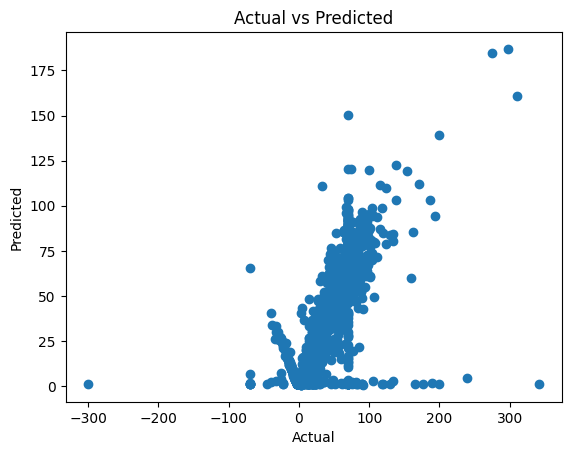

In [119]:
import matplotlib.pyplot as plt
# Add plots to visualize the difference between actual vs predicted values
plt.figure()
plt.scatter(test_y, y_hat)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()